In [1]:
import pandas as pd
df = pd.read_csv('dfen2019.csv')
df=df.drop(columns=['label'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['date']=df['date'].astype('datetime64[ns]')
df.head()

,id_ticket,store,hour,product_code,product_name,department,category,brand,sales_qty,sales_value,price,date,client_id,weekday,month,year,day,time,timebin,bin
0,16-2019-05-10-4-156175,16,09:53:00,46359,RICOTA WAGNER S/SAL KG,DAIRY,CHEESES,WAGNER,0.42,4.47,10.77,2019-05-10,212325,4,5,2019,10,9,M,1
1,6-2019-01-02-26-62211,6,10:12:00,42690,PERA PACKHAMS KG,GREENGROCER,FRUITS,DIVERSAS,0.64,3.83,5.98,2019-01-02,149619,2,1,2019,2,10,M,1
2,4-2019-01-02-13-107543,4,19:43:00,94,MELANCIA KG,GREENGROCER,FRUITS,DIVERSAS,2.36,2.33,0.99,2019-01-02,129202,2,1,2019,2,19,E,3
3,5-2019-01-03-19-171401,5,10:12:00,88,MAMAO PAPAYA UN,GREENGROCER,FRUITS,DIVERSAS,3.00,7.77,2.59,2019-01-03,157034,3,1,2019,3,10,M,1
4,6-2019-01-03-24-104103,6,10:50:00,49,CEBOLA CABECA KG,GREENGROCER,VEGETABLES,DIVERSAS,0.98,1.95,1.99,2019-01-03,213539,3,1,2019,3,10,M,1


In [2]:
#use store names
datastore=[[2,'Imbituba(2:01)',22,2589.31,-28.239597227964204, -48.66589713944407],
          [3,'Michel(3:05)',6,477.00,-28.65001837373967, -49.368464996422176],
          [4,'Urussanga(4:07)',10,1050.00,-28.493231753995776, -49.310786774692254],
          [5,'Garopaba(5:10)',18,1642.15,-28.004400040474923, -48.62232508648647],
          [6,'Orleans(6:11)',13,1335.08,-28.33407759699044, -49.28778066130743],
          [7,'Laguna(7:12)',16,1490.00,-28.45231475303656, -48.7880343261746],
          [9,'Tubarao(9:14)',10,1440.00,-28.466534159331573, -49.01635396491701],
           [15,'Pinheirinho(15:15)',7,880.78,-28.663274205161887, -49.39593081629356],
           [16,'Cocal(16:16)',5,375.56,-28.5308073872356, -49.32827471169928],
           [17,'Caravaggio(17:17)',5,500.00,-28.63054493198368, -49.47977160788221],
           [19,'Metropol(19:19)',5,500.00,-28.61679196637369, -49.43851570845118]]
dfstore=pd.DataFrame(datastore,columns=['store','branch','checkout','sales_area','Longitude','Latitude'])
store=dfstore['store'].tolist()
branch=dfstore['branch'].tolist()
df['branch']=df['store'].replace(store,branch)
df.head()


,id_ticket,store,hour,product_code,product_name,department,category,brand,sales_qty,sales_value,...,date,client_id,weekday,month,year,day,time,timebin,bin,branch
0,16-2019-05-10-4-156175,16,09:53:00,46359,RICOTA WAGNER S/SAL KG,DAIRY,CHEESES,WAGNER,0.42,4.47,...,2019-05-10,212325,4,5,2019,10,9,M,1,Cocal(16:16)
1,6-2019-01-02-26-62211,6,10:12:00,42690,PERA PACKHAMS KG,GREENGROCER,FRUITS,DIVERSAS,0.64,3.83,...,2019-01-02,149619,2,1,2019,2,10,M,1,Orleans(6:11)
2,4-2019-01-02-13-107543,4,19:43:00,94,MELANCIA KG,GREENGROCER,FRUITS,DIVERSAS,2.36,2.33,...,2019-01-02,129202,2,1,2019,2,19,E,3,Urussanga(4:07)
3,5-2019-01-03-19-171401,5,10:12:00,88,MAMAO PAPAYA UN,GREENGROCER,FRUITS,DIVERSAS,3.00,7.77,...,2019-01-03,157034,3,1,2019,3,10,M,1,Garopaba(5:10)
4,6-2019-01-03-24-104103,6,10:50:00,49,CEBOLA CABECA KG,GREENGROCER,VEGETABLES,DIVERSAS,0.98,1.95,...,2019-01-03,213539,3,1,2019,3,10,M,1,Orleans(6:11)


In [3]:
import plotly.express as px
import plotly
def store_plots(df,freq):
    #freq='W','M','D'
    timeslot={'W':'weekly','D':'daily','M':'monthly'}
    dfdate = df[['date', 'sales_value','branch','client_id']].groupby(['branch',pd.Grouper(key='date', freq=freq)]).agg({'sales_value':'mean', 
                             'client_id':'nunique'}).reset_index()
    dfdate['month']=pd.DatetimeIndex(dfdate['date']).month
    dfdate['week']=pd.DatetimeIndex(dfdate['date']).week
    dfdate['day']=pd.DatetimeIndex(dfdate['date']).day
    fig = px.line(dfdate, x="date", y='sales_value',color='branch',
                  hover_data=['sales_value','client_id'],
                 title=str(timeslot[freq])+' average sales value of stores')
    fig.update_layout(paper_bgcolor='#fff',plot_bgcolor='#fff')
    nameofplot='store '+str(timeslot[freq])+' plot.html'
    plotly.offline.plot(fig, filename = nameofplot)
    return dfdate
store_plots(df,'W')

<ipython-input-3-7b54be559f6b>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dfdate['week']=pd.DatetimeIndex(dfdate['date']).week


,branch,date,sales_value,client_id,month,week,day
0,Caravaggio(17:17),2019-01-20,6.149593,41,1,3,20
1,Caravaggio(17:17),2019-01-27,6.283248,54,1,4,27
2,Caravaggio(17:17),2019-02-03,6.493060,47,2,5,3
3,Caravaggio(17:17),2019-02-10,6.866987,38,2,6,10
4,Caravaggio(17:17),2019-02-17,6.173799,32,2,7,17
...,...,...,...,...,...,...,...
546,Urussanga(4:07),2019-12-08,7.266694,2274,12,49,8
547,Urussanga(4:07),2019-12-15,7.609913,2267,12,50,15
548,Urussanga(4:07),2019-12-22,7.853541,2308,12,51,22
549,Urussanga(4:07),2019-12-29,8.360500,2140,12,52,29


In [4]:
import plotly as plt
import plotly.express as px
import json
from urllib.request import urlopen
import pandas as pd
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson') as response:
    Brazil = json.load(response) # Javascrip object notation 
state_id_map = {}
for feature in Brazil ['features']:
    feature['id'] = feature['properties']['name']
    state_id_map[feature['properties']['sigla']] = feature['id']
soybean = pd.read_csv('https://raw.githubusercontent.com/nayanemaia/Dataset_Soja/main/soja%20sidra.csv')
print(soybean)


      ano            Estado  Produção  Longitude   Latitude  Unnamed: 5
0    1940          Rondônia         0 -11.474053 -62.226545         NaN
1    1950          Rondônia         1 -11.474053 -62.226545         NaN
2    1960          Rondônia         0 -11.474053 -62.226545         NaN
3    1970          Rondônia         0 -11.474053 -62.226545         NaN
4    1975          Rondônia        66 -11.474053 -62.226545         NaN
..    ...               ...       ...        ...        ...         ...
265  1980  Distrito Federal     10294 -15.858437 -47.596956         NaN
266  1985  Distrito Federal     66254 -15.858437 -47.596956         NaN
267  1995  Distrito Federal     50229 -15.858437 -47.596956         NaN
268  2006  Distrito Federal    112436 -15.858437 -47.596956         NaN
269  2017  Distrito Federal    243805 -15.858437 -47.596956         NaN

[270 rows x 6 columns]


In [5]:
f = open('stanford-xw152bd5158-geojson.json',)
Santa = json.load(f)
Santa_state = {}
names=[]
for feature in Santa ['features']:
    feature['id'] = feature['properties']['nome']
    names.append(feature['id'] )
    Santa_state[feature['properties']['nome']] = feature['id']

In [6]:
lst=dfstore.branch.tolist()
lstnew=['Imbituba','Criciúma ','Urussanga','Garopaba','Orleans','Laguna','Tubarão','Criciúma ','Cocal do Sul','Nova Veneza','Criciúma']
dfstore['loc']=dfstore['branch'].replace(lst,lstnew)
dfstore

,store,branch,checkout,sales_area,Longitude,Latitude,loc
0,2,Imbituba(2:01),22,2589.31,-28.239597,-48.665897,Imbituba
1,3,Michel(3:05),6,477.00,-28.650018,-49.368465,Criciúma
2,4,Urussanga(4:07),10,1050.00,-28.493232,-49.310787,Urussanga
3,5,Garopaba(5:10),18,1642.15,-28.004400,-48.622325,Garopaba
4,6,Orleans(6:11),13,1335.08,-28.334078,-49.287781,Orleans
5,7,Laguna(7:12),16,1490.00,-28.452315,-48.788034,Laguna
6,9,Tubarao(9:14),10,1440.00,-28.466534,-49.016354,Tubarão
7,15,Pinheirinho(15:15),7,880.78,-28.663274,-49.395931,Criciúma
8,16,Cocal(16:16),5,375.56,-28.530807,-49.328275,Cocal do Sul
9,17,Caravaggio(17:17),5,500.00,-28.630545,-49.479772,Nova Veneza


In [7]:
dfdate = df[['date', 'sales_value','branch','client_id']].groupby(['branch',pd.Grouper(key='date', freq='Y')]).agg({'sales_value':'sum', 
                             'client_id':'nunique'}).reset_index()
dfdate=dfdate.merge(dfstore[['branch','loc']],how='left',on='branch')
dfdate

,branch,date,sales_value,client_id,loc
0,Caravaggio(17:17),2019-12-31,1.651833e+05,267,Nova Veneza
1,Cocal(16:16),2019-12-31,6.139756e+06,2531,Cocal do Sul
2,Garopaba(5:10),2019-12-31,1.919332e+07,6451,Garopaba
3,Imbituba(2:01),2019-12-31,3.550971e+07,10411,Imbituba
4,Laguna(7:12),2019-12-31,2.466842e+07,7949,Laguna
5,Metropol(19:19),2019-12-31,1.318576e+05,219,Criciúma
6,Michel(3:05),2019-12-31,6.487445e+06,3912,Criciúma
7,Orleans(6:11),2019-12-31,1.476745e+07,4857,Orleans
8,Pinheirinho(15:15),2019-12-31,6.654481e+06,3622,Criciúma
9,Tubarao(9:14),2019-12-31,7.400525e+06,3838,Tubarão


In [8]:
dfx=store_plots(df,'W')
dfx=dfx.merge(dfstore[['branch','loc']],how='left',on='branch')
fig = px.choropleth(
 dfx, #soybean database
 locations = 'loc', #define the limits on the map/geography
 geojson = Santa, #shape information
 color = 'sales_value', #defining the color of the scale through the database
 hover_name = 'branch', #the information in the box
 hover_data =["sales_value",'loc'],
 title = "Total Sales value of stores", #title of the map
 animation_frame = 'week' #creating the application based on the year
)
fig.update_geos(fitbounds = 'locations', visible = False)
plotly.offline.plot(fig, filename = 'santa_map.html')

<ipython-input-3-7b54be559f6b>:9: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



'santa_map.html'

In [143]:
from scipy.stats import entropy
from tqdm import tqdm
feature_vecs_2019 = []
df['weekday']=pd.DatetimeIndex(df['date']).weekday
df['month']=pd.DatetimeIndex(df['date']).month
df['product_code']=df['product_code'].astype('category')
df['department']=df['department'].astype('category')
df['category']=df['category'].astype('category')
df['brand']=df['brand'].astype('category')
for i in df['month'].unique().tolist():
    dfmonth=df.loc[df['month']==i]
    for key, ind in tqdm(dfmonth.groupby(by="client_id").groups.items()):
        subdf = dfmonth.loc[ind]
        weekend_cond = (subdf["weekday"] == 5) |  (subdf["weekday"] == 6)  
        weekend_df = subdf[weekend_cond]
        week_df = subdf[~weekend_cond]  

        weekend_count = weekend_df.shape[0]
        week_count = week_df.shape[0]
        gg=dfmonth.loc[dfmonth['brand'].str.contains("ALTHOFF", case=False)]
        altbrn=gg.brand.unique().tolist()
        cats = weekend_df["category"].value_counts(normalize=True).values
        if weekend_count!=0:
            weekend_ent = entropy(cats)/np.log(len(cats))
            weekend_brands = weekend_df["brand"].value_counts(normalize=True)
            wn_sum = weekend_brands[['ALTHOFF','ALTHOFF D']].sum()
        else:
            weekend_ent=0
            wn_sum=0

        cats = week_df["category"].value_counts(normalize=True).values
        if week_count!=0:
            week_ent = entropy(cats)/np.log(len(cats))
            week_brands = week_df["brand"].value_counts(normalize=True)
            w_sum = week_brands[['ALTHOFF','ALTHOFF D']].sum()
        else:
            week_ent=0
            w_sum=0
        feature_vecs_2019.append((key, weekend_count, week_count, weekend_ent, week_ent, wn_sum, w_sum,i))

100%|██████████| 36712/36712 [19:21<00:00, 31.60it/s]


In [146]:
vect2019=pd.DataFrame(data=feature_vecs_2019,columns=['client_id','weekend_count','week_count','weekend_ent','week_ent','weekend_brand_sum',
                                             'week_brand_sum','month'])


In [157]:
#recency,frequency, sales_volume
dfmonth=df.loc[df['month']==1]
rfm2019month=pd.DataFrame(dfmonth['client_id'].unique())
rfm2019month.columns=['client_id']
max_purchase=dfmonth.groupby('client_id').date.max().reset_index()
max_purchase.columns=['client_id','maxpurchasedate']
max_purchase['recency']=(max_purchase['maxpurchasedate'].max()-max_purchase['maxpurchasedate']).dt.days
rfm2019month=pd.merge(rfm2019month,max_purchase[['client_id','recency']],on='client_id')
rfm2019month['month']=rfm2019month['client_id'].apply(lambda x:1)

frequency2019month=dfmonth.groupby('client_id').date.count().reset_index()
frequency2019month.columns=['client_id','frequency']
frequency2019month['month']=frequency2019month['client_id'].apply(lambda x:1)

revenue2019month=dfmonth.groupby('client_id').sales_value.mean().reset_index()
revenue2019month['month']=revenue2019month['client_id'].apply(lambda x:1)
for i in [2,3,4,5,6,7,8,9,10,11,12]:
    dfmonth=df.loc[df['month']==i]
    rfm2019=pd.DataFrame(dfmonth['client_id'].unique())
    rfm2019.columns=['client_id']
    max_purchase=dfmonth.groupby('client_id').date.max().reset_index()
    max_purchase.columns=['client_id','maxpurchasedate']
    max_purchase['recency']=(max_purchase['maxpurchasedate'].max()-max_purchase['maxpurchasedate']).dt.days
    rfm2019=pd.merge(rfm2019,max_purchase[['client_id','recency']],on='client_id')
    rfm2019['month']=rfm2019['client_id'].apply(lambda x:i)
    rfm2019month=pd.concat([rfm2019month,rfm2019])
    frequency2019=dfmonth.groupby('client_id').date.count().reset_index()
    frequency2019.columns=['client_id','frequency']
    frequency2019['month']=frequency2019['client_id'].apply(lambda x:i)
    frequency2019month=pd.concat([frequency2019month,frequency2019])
    revenue2019=dfmonth.groupby('client_id').sales_value.mean().reset_index()
    revenue2019['month']=revenue2019['client_id'].apply(lambda x:i)
    revenue2019month=pd.concat([revenue2019month,revenue2019])
rfm2019month=pd.merge(rfm2019month,frequency2019month,on=['client_id','month'])
rfm2019month=pd.merge(rfm2019month,revenue2019month,on=['client_id','month'])
feature2019month=pd.merge(rfm2019month,vect2019,on=['client_id','month'])
feature2019month

,client_id,recency,month,frequency,sales_value,weekend_count,week_count,weekend_ent,week_ent,weekend_brand_sum,week_brand_sum
0,149619,0,1,97,7.101856,22,75,0.499358,0.504588,0.000000,0.053333
1,129202,1,1,54,7.091296,18,36,0.396820,0.484497,0.222222,0.222222
2,157034,2,1,115,6.793130,31,84,0.523692,0.559806,0.000000,0.011905
3,213539,1,1,62,4.717258,12,50,0.433648,0.511371,0.166667,0.200000
4,92581,8,1,39,6.119231,0,39,0.000000,0.476074,0.000000,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
423778,44110,0,12,23,10.030435,0,23,0.000000,0.503512,0.000000,0.043478
423779,72071,0,12,7,5.797143,0,7,0.000000,0.356144,0.000000,0.000000
423780,17849,0,12,3,15.420000,0,3,0.000000,0.201070,0.000000,0.000000
423781,41084,0,12,52,4.161346,0,52,0.000000,0.517958,0.000000,0.019231


In [10]:
#feature2019month.to_csv('features2019.csv')
feature2019month= pd.read_csv('features2019.csv')

In [11]:
#normalize the features to get same range of values.
import scipy.stats as stats
lst= ['recency','frequency','sales_value','weekend_count','week_count','weekend_ent','week_ent','weekend_brand_sum','week_brand_sum']
norm2019= feature2019month.copy()
for i in lst:
    norm2019[i]=stats.zscore(feature2019month[i])
norm2019

,Unnamed: 0,client_id,recency,month,frequency,sales_value,weekend_count,week_count,weekend_ent,week_ent,weekend_brand_sum,week_brand_sum
0,0,149619,-0.943730,1,1.112177,-0.035996,0.350253,1.184836,1.117139,0.569145,-0.496302,-0.233536
1,1,129202,-0.808537,1,0.167467,-0.037679,0.168713,0.107842,0.659067,0.465752,1.544597,1.192998
2,2,157034,-0.673344,1,1.507637,-0.085205,0.758719,1.433373,1.225849,0.853292,-0.496302,-0.583465
3,3,213539,-0.808537,1,0.343227,-0.416086,-0.103597,0.494455,0.823594,0.604046,1.034372,1.005296
4,4,92581,0.137811,1,-0.162082,-0.192620,-0.648217,0.190688,-1.113656,0.422411,-0.496302,0.615454
...,...,...,...,...,...,...,...,...,...,...,...,...
423778,423778,44110,-0.943730,12,-0.513602,0.430801,-0.648217,-0.251156,-1.113656,0.563603,-0.496302,-0.316777
423779,423779,72071,-0.943730,12,-0.865122,-0.243959,-0.648217,-0.692999,-1.113656,-0.194750,-0.496302,-0.684020
423780,423780,17849,-0.943730,12,-0.953002,1.289865,-0.648217,-0.803460,-1.113656,-0.992760,-0.496302,-0.684020
423781,423781,41084,-0.943730,12,0.123527,-0.504695,-0.648217,0.549686,-1.113656,0.637945,-0.496302,-0.521585


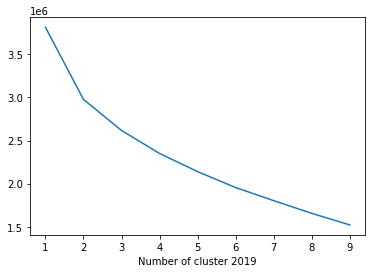

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse={}
for k in range(1,10):
    kmeans=KMeans(n_clusters=k).fit(norm2019[lst])
    sse[k]=kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of cluster 2019')
plt.show()

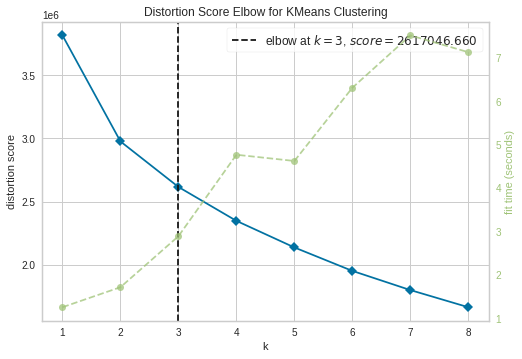

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
X=norm2019[lst]
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,9))
visualizer.fit(X)
visualizer.show()

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
clust2019=norm2019.copy()
clust2019['Cluster']=kmeans.predict(X)
#feature.groupby('Cluster').describe()
clust2019

,Unnamed: 0,client_id,recency,month,frequency,sales_value,weekend_count,week_count,weekend_ent,week_ent,weekend_brand_sum,week_brand_sum,Cluster
0,0,149619,-0.943730,1,1.112177,-0.035996,0.350253,1.184836,1.117139,0.569145,-0.496302,-0.233536,2
1,1,129202,-0.808537,1,0.167467,-0.037679,0.168713,0.107842,0.659067,0.465752,1.544597,1.192998,0
2,2,157034,-0.673344,1,1.507637,-0.085205,0.758719,1.433373,1.225849,0.853292,-0.496302,-0.583465,2
3,3,213539,-0.808537,1,0.343227,-0.416086,-0.103597,0.494455,0.823594,0.604046,1.034372,1.005296,0
4,4,92581,0.137811,1,-0.162082,-0.192620,-0.648217,0.190688,-1.113656,0.422411,-0.496302,0.615454,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423778,423778,44110,-0.943730,12,-0.513602,0.430801,-0.648217,-0.251156,-1.113656,0.563603,-0.496302,-0.316777,1
423779,423779,72071,-0.943730,12,-0.865122,-0.243959,-0.648217,-0.692999,-1.113656,-0.194750,-0.496302,-0.684020,1
423780,423780,17849,-0.943730,12,-0.953002,1.289865,-0.648217,-0.803460,-1.113656,-0.992760,-0.496302,-0.684020,1
423781,423781,41084,-0.943730,12,0.123527,-0.504695,-0.648217,0.549686,-1.113656,0.637945,-0.496302,-0.521585,1


In [14]:
center2019=kmeans.cluster_centers_
centers2019=pd.DataFrame(center2019)
centers2019.columns=['recency','frequency','sales_value','weekend_count',
                                             'week_count','weekend_ent','week_ent',
           'weekend_brand_sum','week_brand_sum']
centers2019

,recency,frequency,sales_value,weekend_count,week_count,weekend_ent,week_ent,weekend_brand_sum,week_brand_sum
0,-0.090461,-0.246856,-0.055232,0.272799,-0.476275,0.727836,-0.496051,0.660627,0.036731
1,0.348251,-0.514100,0.086128,-0.589904,-0.287263,-0.879267,-0.096849,-0.495323,0.022174
2,-0.620111,1.502143,-0.102682,0.865990,1.361197,0.795337,0.976350,0.061508,-0.105021


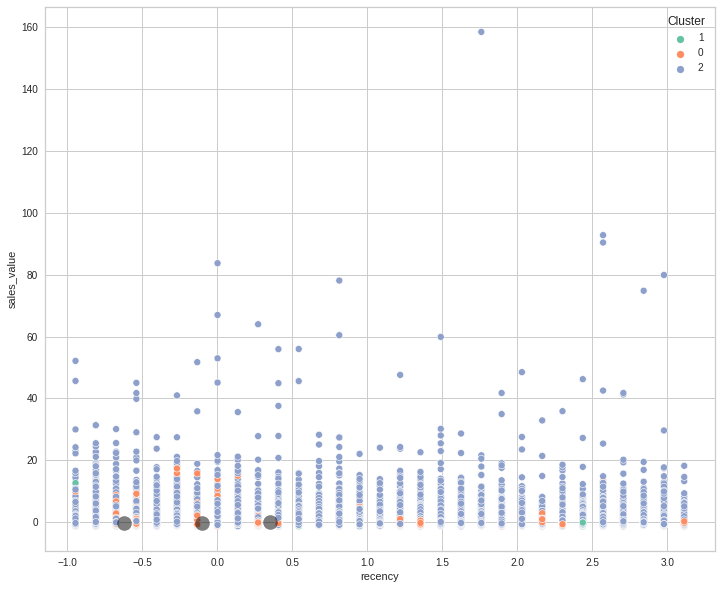

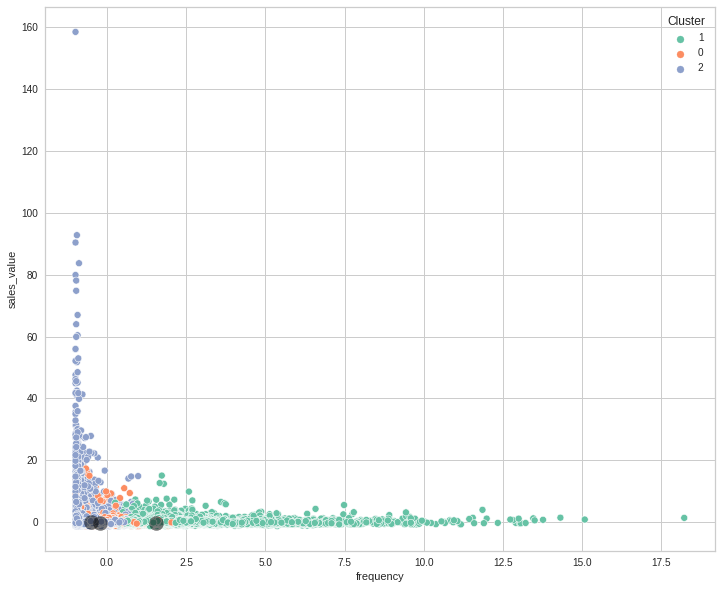

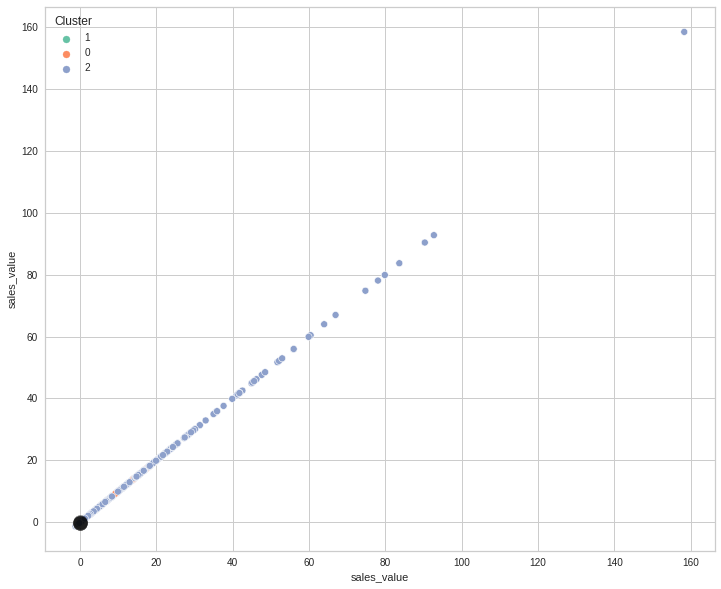

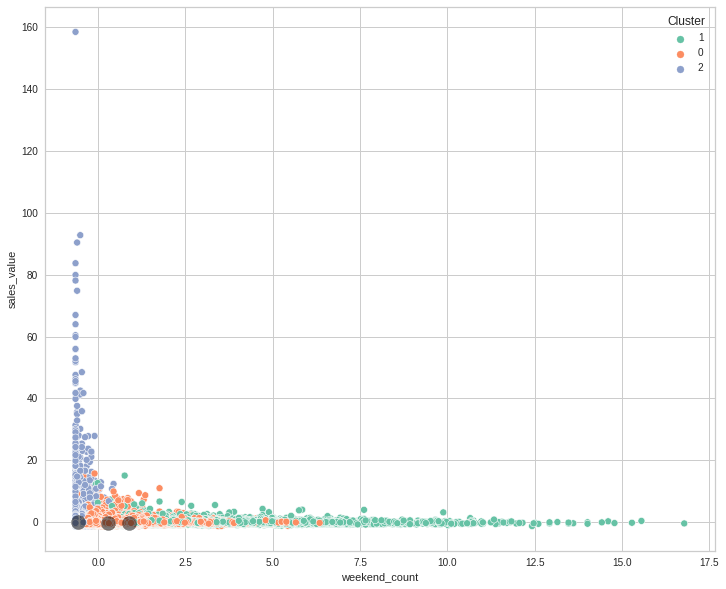

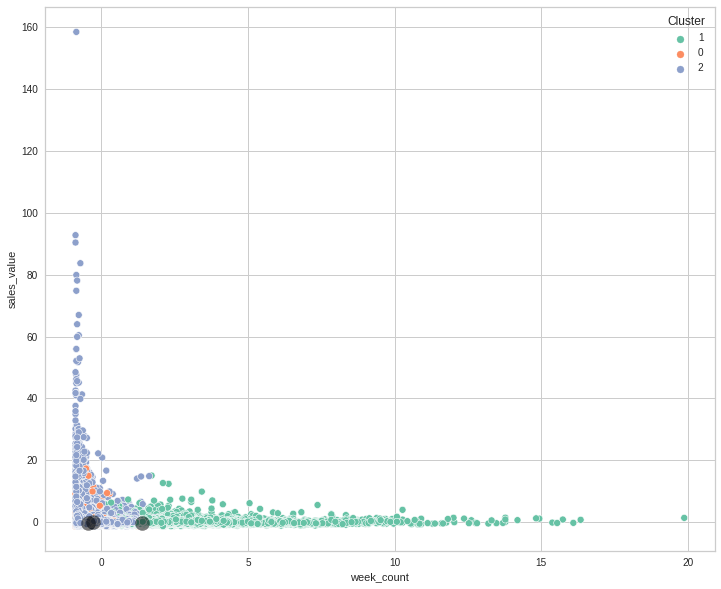

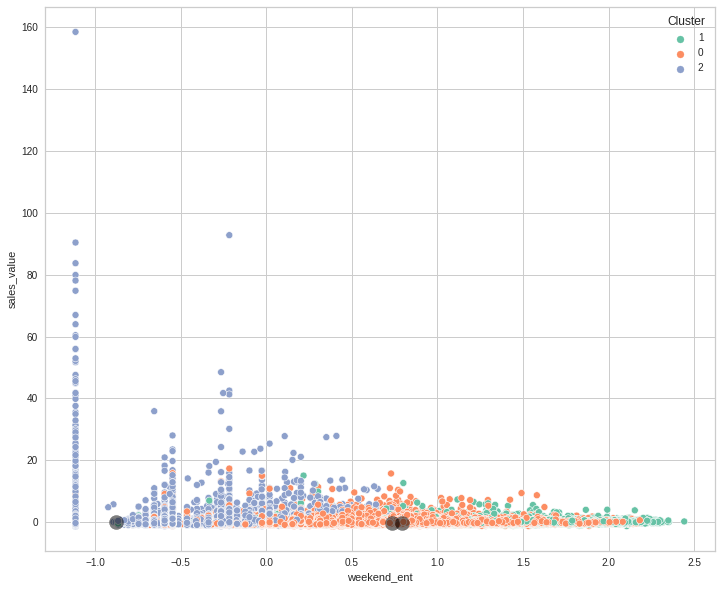

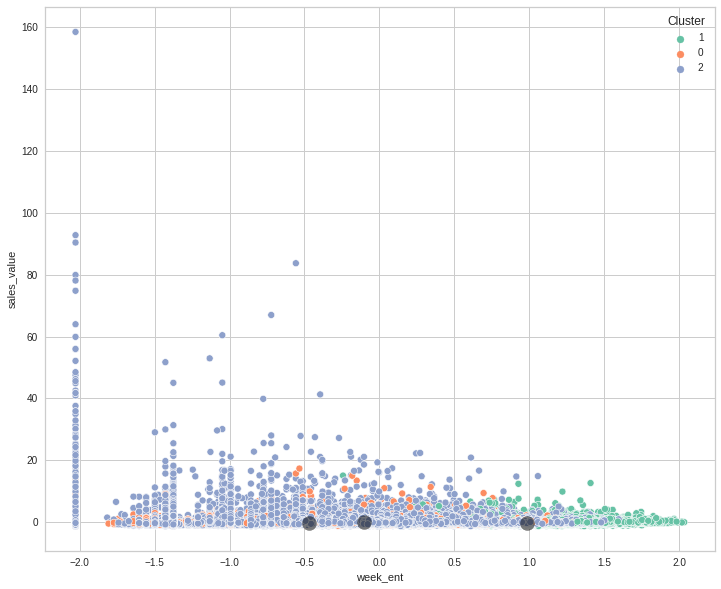

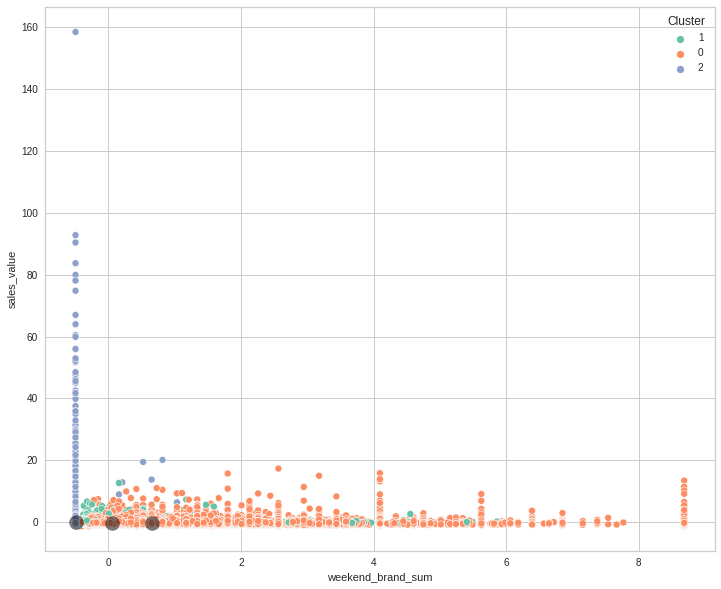

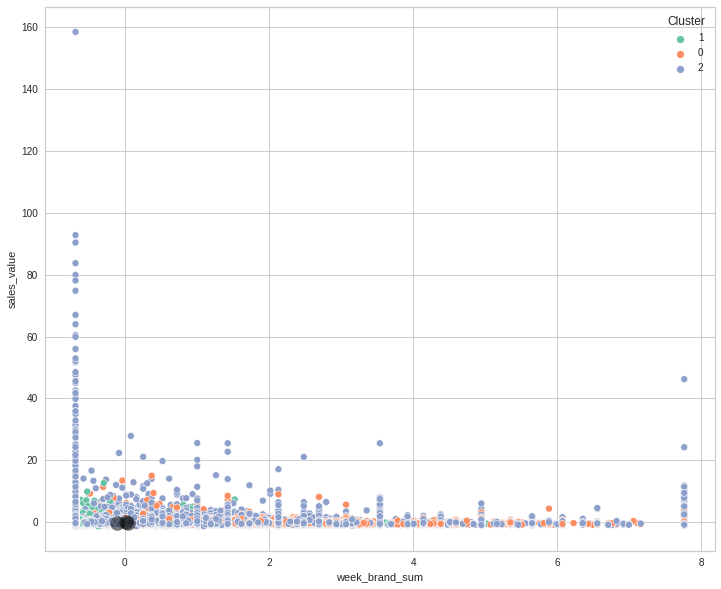

In [192]:
import seaborn as sns
graph=clust2019
for i in lst:
    fig,ax=plt.subplots(figsize=(12,10))
    sns.scatterplot(data=graph,x=i,y='sales_value',hue='Cluster',legend='full',palette='Set2',ax=ax)
    plt.scatter(centers2019[i],centers2019['sales_value'],c='black',s=200,alpha=0.5)
    plt.show()

In [15]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
pca=PCA(n_components=3)
pca_result=pca.fit_transform(clust2019[lst].values)
clust2019['pca-one']=pca_result[:,0]
clust2019['pca-two']=pca_result[:,1]
clust2019['pca-three']=pca_result[:,2]
clust2019['Cluster']=clust2019['Cluster'].astype('str')


In [16]:
fig = px.scatter(clust2019, 
        x='pca-one', y='pca-two',
        color="Cluster", hover_data=['Cluster'])
plotly.offline.plot(fig, filename = '2D-pca.html')

'2D-pca.html'

<AxesSubplot:xlabel='pca-two', ylabel='pca-three'>

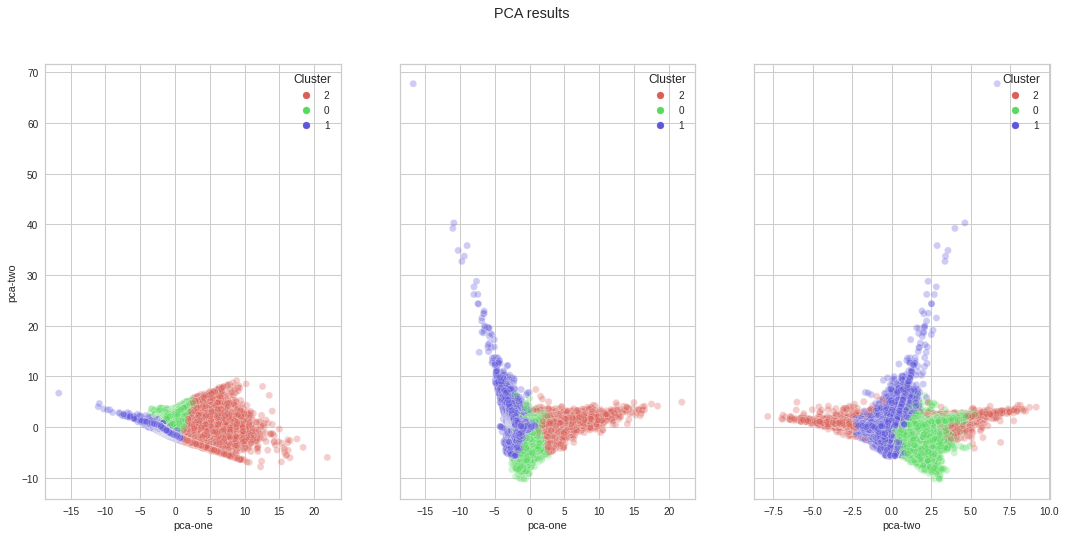

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
fig.suptitle('PCA results')
sns.scatterplot(ax=axes[0],x='pca-one',y='pca-two',hue='Cluster',palette=sns.color_palette('hls',3),data=clust2019,alpha=0.3)
sns.scatterplot(ax=axes[1],x='pca-one',y='pca-three',hue='Cluster',palette=sns.color_palette('hls',3),data=clust2019,alpha=0.3)
sns.scatterplot(ax=axes[2],x='pca-two',y='pca-three',hue='Cluster',palette=sns.color_palette('hls',3),data=clust2019,alpha=0.3)


In [202]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=3,verbose=1,perplexity=50)
tsne_results=tsne.fit_transform(clust2019[lst].values)
clust2019['tsne-3d-one']=tsne_results[:,0]
clust2019['tsne-3d-two']=tsne_results[:,1]
clust2019['tsne-3d-three']=tsne_results[:,2]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 423783 samples in 8.281s...
[t-SNE] Computed neighbors for 423783 samples in 168.739s...
[t-SNE] Computed conditional probabilities for sample 1000 / 423783
[t-SNE] Computed conditional probabilities for sample 2000 / 423783
[t-SNE] Computed conditional probabilities for sample 3000 / 423783
[t-SNE] Computed conditional probabilities for sample 4000 / 423783
[t-SNE] Computed conditional probabilities for sample 5000 / 423783
[t-SNE] Computed conditional probabilities for sample 6000 / 423783
[t-SNE] Computed conditional probabilities for sample 7000 / 423783
[t-SNE] Computed conditional probabilities for sample 8000 / 423783
[t-SNE] Computed conditional probabilities for sample 9000 / 423783
[t-SNE] Computed conditional probabilities for sample 10000 / 423783
[t-SNE] Computed conditional probabilities for sample 11000 / 423783
[t-SNE] Computed conditional probabilities for sample 12000 / 423783
[t-SNE] Computed conditional prob

In [205]:
fig = px.scatter(clust2019, 
        x='tsne-2d-one', y='tsne-2d-two',
        color="Cluster", hover_data=['Cluster'])
plotly.offline.plot(fig, filename = '2D-tsne.html')

'2D-tsne.html'

In [206]:
fig = px.scatter(clust2019, 
        x='tsne-3d-one', y='tsne-3d-three',
        color="Cluster", hover_data=['Cluster'])
plotly.offline.plot(fig, filename = '3D-tsne.html')

'3D-tsne.html'

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

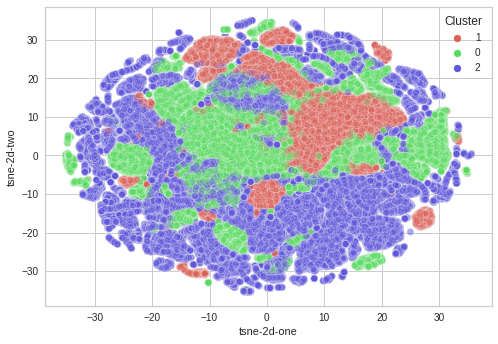

In [188]:
sns.scatterplot(x='tsne-2d-one',y='tsne-2d-two',hue='Cluster',palette=sns.color_palette('hls',3),
                data=clust2019,legend='full',alpha=0.3)

Text(0.5, 1.0, '2019')

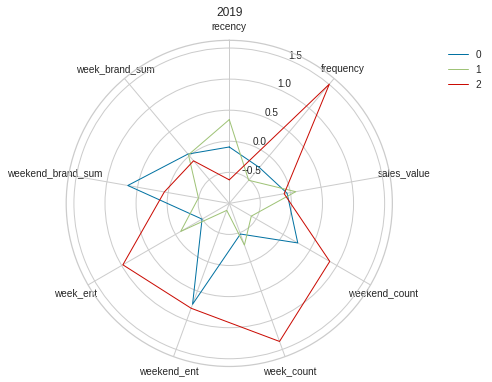

In [19]:
import matplotlib.pyplot as plt
from math import pi
feat_vec=['Cluster','recency','frequency','sales_value','weekend_count',
                                             'week_count','weekend_ent','week_ent',
           'weekend_brand_sum','week_brand_sum']
df2019=clust2019[feat_vec]
grp2019=df2019.groupby('Cluster').mean().reset_index()
categories=list(grp2019)[1:]
N=len(categories)
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]
plt.figure(figsize=(12,6))
ax=plt.subplot(111,polar=True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
lst=['recency','frequency','sales_value','weekend_count','week_count','weekend_ent','week_ent',
           'weekend_brand_sum','week_brand_sum']
for i in range(0,3):
    values=grp2019.loc[i].drop('Cluster').values.flatten().tolist()
    values+=values[:1]
    ax.plot(angles,values,linewidth=1,linestyle='solid',label=str(i))
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.title('2019')

In [20]:
catbrand=df.groupby(['category','brand'])['price'].mean().reset_index()
justcat=catbrand.groupby('category')['price'].max().reset_index()
catbrand['max_val']=catbrand['category'].replace(justcat.category.tolist(),justcat.price.tolist())
catbrand['ratio']=catbrand['price']/catbrand['max_val']
catbrand

,category,brand,price,max_val,ratio
0,ABSORBENTS,ALWAYS,8.078218,28.391849,0.284526
1,ABSORBENTS,BIGFRAL,28.391849,28.391849,1.000000
2,ABSORBENTS,BIOFRAL,14.589538,28.391849,0.513864
3,ABSORBENTS,CAREFREE,10.580948,28.391849,0.372676
4,ABSORBENTS,COTTONBABY,9.085918,28.391849,0.320019
...,...,...,...,...,...
2461,YOGURTES,VENEZA,3.296451,8.010142,0.411535
2462,YOGURTES,VERDE CAMPO,6.366713,8.010142,0.794831
2463,YOGURTES,VIG,4.200751,8.010142,0.524429
2464,YOGURTES,VIGOR,3.014862,8.010142,0.376381


In [21]:
fig = px.scatter(catbrand, x="ratio", y="price", color="category",
                 size='ratio', hover_data=['brand','category'])
plotly.offline.plot(fig, filename = 'brnad.html')

'brnad.html'

In [24]:
sales=df.groupby(['id_ticket','client_id'])['sales_value'].sum().reset_index()
catbucket=df.groupby(['date','id_ticket','client_id','category','brand','product_name'])['sales_value'].sum().reset_index()
buckets = pd.merge(catbucket, catbrand[['category','brand','ratio']], on=['category', 'brand'], how='left')


In [25]:
prod=buckets.groupby(['client_id','product_name',])['id_ticket'].count().reset_index()
tot=prod.groupby('client_id')['id_ticket'].sum().reset_index()
tot.columns = ['client_id','Total']
prod=prod.merge(tot[['client_id','Total']],how='left',on='client_id')
prod

,client_id,product_name,id_ticket,Total
0,15,ABACATE KG,1,107
1,15,ACHOC NESCAU 2.0 PT 400G,1,107
2,15,ALFACE CRESPA NUNES,1,107
3,15,AMENDOIM PETTIZ DORI NATURAL PCT 150G,1,107
4,15,ARROZ RAMPINELLI BRANCO PCT 1KG,1,107
...,...,...,...,...
9510525,242433,VASSOURA BRILHUS MULTIUSO,1,691
9510526,242433,VELA ANDREIA N 2 BRANCA C/8,1,691
9510527,242433,VINAGRE HEINIG FR 900ML,1,691
9510528,242433,VINHO CANCAO TT SUAVE GFA 750ML,1,691


In [26]:
prod['product_ratio']=prod['id_ticket']/prod['Total']
prod

,client_id,product_name,id_ticket,Total,product_ratio
0,15,ABACATE KG,1,107,0.009346
1,15,ACHOC NESCAU 2.0 PT 400G,1,107,0.009346
2,15,ALFACE CRESPA NUNES,1,107,0.009346
3,15,AMENDOIM PETTIZ DORI NATURAL PCT 150G,1,107,0.009346
4,15,ARROZ RAMPINELLI BRANCO PCT 1KG,1,107,0.009346
...,...,...,...,...,...
9510525,242433,VASSOURA BRILHUS MULTIUSO,1,691,0.001447
9510526,242433,VELA ANDREIA N 2 BRANCA C/8,1,691,0.001447
9510527,242433,VINAGRE HEINIG FR 900ML,1,691,0.001447
9510528,242433,VINHO CANCAO TT SUAVE GFA 750ML,1,691,0.001447


In [27]:
buckets=buckets.merge(prod[['client_id','product_name','product_ratio']],how='left',on=['client_id','product_name'])
buckets

,date,id_ticket,client_id,category,brand,product_name,sales_value,ratio,product_ratio
0,2019-01-02,15-2019-01-02-1-154057,227202,COUNTRY PRODUCTION,ALTHOFF,PAO FRANCES ALTHOFF P KG,1.52,0.436709,0.005540
1,2019-01-02,15-2019-01-02-1-154057,227202,DISPOSABLE,PLADIL,EMB FREEZER PLADIL 5L C/100,9.19,0.273657,0.002770
2,2019-01-02,15-2019-01-02-1-154057,227202,SPONGE,SCOTCH BRITE,ESPONJA SCOTCH BRITE M USO C/3 35 DESC,11.18,0.809253,0.002770
3,2019-01-02,15-2019-01-02-1-154057,227202,WASTE BAG,VERSATIL,SACO LIXO VERSATIL 100L ROLO C/25,34.76,0.417956,0.002770
4,2019-01-02,15-2019-01-02-1-154070,83573,COUNTRY PRODUCTION,ALTHOFF,PAO DOCE ALTHOFF P FAROFA C/CREME MD KG,3.88,0.436709,0.005291
...,...,...,...,...,...,...,...,...,...
19653968,2019-12-31,9-2019-12-31-9-278309,17492,FILTERED OUT,COLLINA,FILTRADO COLLINA DEL SOLE ROSE GFA 660ML,11.79,0.790310,0.005988
19653969,2019-12-31,9-2019-12-31-9-278309,17492,MINERAL WATER,DA PEDRA,AGUA MIN AGUA DA PEDRA C/GAS PET 500ML,5.16,0.516387,0.011976
19653970,2019-12-31,9-2019-12-31-9-278309,17492,TRADITIONAL BEER,LOKAL,CERVEJA LOKAL PILSEN LT 350ML C/12,19.08,0.447240,0.005988
19653971,2019-12-31,9-2019-12-31-9-278314,67050,FRUITS,DIVERSAS,LIMAO TAHITI KG,3.55,0.206193,0.001453


In [28]:
catdev=buckets.groupby(['client_id','category'])['ratio'].mean().reset_index()
catdev.columns = ['client_id','category','average_category_ratio']
buckets=buckets.merge(catdev,how='left', on=['client_id','category'])

buckets

,date,id_ticket,client_id,category,brand,product_name,sales_value,ratio,product_ratio,average_category_ratio
0,2019-01-02,15-2019-01-02-1-154057,227202,COUNTRY PRODUCTION,ALTHOFF,PAO FRANCES ALTHOFF P KG,1.52,0.436709,0.005540,0.436709
1,2019-01-02,15-2019-01-02-1-154057,227202,DISPOSABLE,PLADIL,EMB FREEZER PLADIL 5L C/100,9.19,0.273657,0.002770,0.228802
2,2019-01-02,15-2019-01-02-1-154057,227202,SPONGE,SCOTCH BRITE,ESPONJA SCOTCH BRITE M USO C/3 35 DESC,11.18,0.809253,0.002770,0.572350
3,2019-01-02,15-2019-01-02-1-154057,227202,WASTE BAG,VERSATIL,SACO LIXO VERSATIL 100L ROLO C/25,34.76,0.417956,0.002770,0.687278
4,2019-01-02,15-2019-01-02-1-154070,83573,COUNTRY PRODUCTION,ALTHOFF,PAO DOCE ALTHOFF P FAROFA C/CREME MD KG,3.88,0.436709,0.005291,0.436709
...,...,...,...,...,...,...,...,...,...,...
19653968,2019-12-31,9-2019-12-31-9-278309,17492,FILTERED OUT,COLLINA,FILTRADO COLLINA DEL SOLE ROSE GFA 660ML,11.79,0.790310,0.005988,0.790310
19653969,2019-12-31,9-2019-12-31-9-278309,17492,MINERAL WATER,DA PEDRA,AGUA MIN AGUA DA PEDRA C/GAS PET 500ML,5.16,0.516387,0.011976,0.490407
19653970,2019-12-31,9-2019-12-31-9-278309,17492,TRADITIONAL BEER,LOKAL,CERVEJA LOKAL PILSEN LT 350ML C/12,19.08,0.447240,0.005988,0.513376
19653971,2019-12-31,9-2019-12-31-9-278314,67050,FRUITS,DIVERSAS,LIMAO TAHITI KG,3.55,0.206193,0.001453,0.207785


In [34]:
#buckets=buckets.drop(['average_category_ratio_x', 'average_category_ratio_y'], axis=1)

In [29]:
buckets['cat_dev']=buckets['ratio']-buckets['average_category_ratio']
buckets

,date,id_ticket,client_id,category,brand,product_name,sales_value,ratio,product_ratio,average_category_ratio,cat_dev
0,2019-01-02,15-2019-01-02-1-154057,227202,COUNTRY PRODUCTION,ALTHOFF,PAO FRANCES ALTHOFF P KG,1.52,0.436709,0.005540,0.436709,5.551115e-17
1,2019-01-02,15-2019-01-02-1-154057,227202,DISPOSABLE,PLADIL,EMB FREEZER PLADIL 5L C/100,9.19,0.273657,0.002770,0.228802,4.485565e-02
2,2019-01-02,15-2019-01-02-1-154057,227202,SPONGE,SCOTCH BRITE,ESPONJA SCOTCH BRITE M USO C/3 35 DESC,11.18,0.809253,0.002770,0.572350,2.369025e-01
3,2019-01-02,15-2019-01-02-1-154057,227202,WASTE BAG,VERSATIL,SACO LIXO VERSATIL 100L ROLO C/25,34.76,0.417956,0.002770,0.687278,-2.693225e-01
4,2019-01-02,15-2019-01-02-1-154070,83573,COUNTRY PRODUCTION,ALTHOFF,PAO DOCE ALTHOFF P FAROFA C/CREME MD KG,3.88,0.436709,0.005291,0.436709,5.551115e-17
...,...,...,...,...,...,...,...,...,...,...,...
19653968,2019-12-31,9-2019-12-31-9-278309,17492,FILTERED OUT,COLLINA,FILTRADO COLLINA DEL SOLE ROSE GFA 660ML,11.79,0.790310,0.005988,0.790310,0.000000e+00
19653969,2019-12-31,9-2019-12-31-9-278309,17492,MINERAL WATER,DA PEDRA,AGUA MIN AGUA DA PEDRA C/GAS PET 500ML,5.16,0.516387,0.011976,0.490407,2.598012e-02
19653970,2019-12-31,9-2019-12-31-9-278309,17492,TRADITIONAL BEER,LOKAL,CERVEJA LOKAL PILSEN LT 350ML C/12,19.08,0.447240,0.005988,0.513376,-6.613613e-02
19653971,2019-12-31,9-2019-12-31-9-278314,67050,FRUITS,DIVERSAS,LIMAO TAHITI KG,3.55,0.206193,0.001453,0.207785,-1.591414e-03


In [30]:
buckets.loc[(buckets['brand'].str.contains('ALTHOFF'))|(buckets['brand'].str.contains('DIVERSAS')),'unbrand']=1

In [33]:
import numpy as np
buckets['unbrand']=buckets['unbrand'].replace(np.nan,0)
buckets

,date,id_ticket,client_id,category,brand,product_name,sales_value,ratio,product_ratio,average_category_ratio,cat_dev,unbrand
0,2019-01-02,15-2019-01-02-1-154057,227202,COUNTRY PRODUCTION,ALTHOFF,PAO FRANCES ALTHOFF P KG,1.52,0.436709,0.005540,0.436709,5.551115e-17,1.0
1,2019-01-02,15-2019-01-02-1-154057,227202,DISPOSABLE,PLADIL,EMB FREEZER PLADIL 5L C/100,9.19,0.273657,0.002770,0.228802,4.485565e-02,0.0
2,2019-01-02,15-2019-01-02-1-154057,227202,SPONGE,SCOTCH BRITE,ESPONJA SCOTCH BRITE M USO C/3 35 DESC,11.18,0.809253,0.002770,0.572350,2.369025e-01,0.0
3,2019-01-02,15-2019-01-02-1-154057,227202,WASTE BAG,VERSATIL,SACO LIXO VERSATIL 100L ROLO C/25,34.76,0.417956,0.002770,0.687278,-2.693225e-01,0.0
4,2019-01-02,15-2019-01-02-1-154070,83573,COUNTRY PRODUCTION,ALTHOFF,PAO DOCE ALTHOFF P FAROFA C/CREME MD KG,3.88,0.436709,0.005291,0.436709,5.551115e-17,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19653968,2019-12-31,9-2019-12-31-9-278309,17492,FILTERED OUT,COLLINA,FILTRADO COLLINA DEL SOLE ROSE GFA 660ML,11.79,0.790310,0.005988,0.790310,0.000000e+00,0.0
19653969,2019-12-31,9-2019-12-31-9-278309,17492,MINERAL WATER,DA PEDRA,AGUA MIN AGUA DA PEDRA C/GAS PET 500ML,5.16,0.516387,0.011976,0.490407,2.598012e-02,0.0
19653970,2019-12-31,9-2019-12-31-9-278309,17492,TRADITIONAL BEER,LOKAL,CERVEJA LOKAL PILSEN LT 350ML C/12,19.08,0.447240,0.005988,0.513376,-6.613613e-02,0.0
19653971,2019-12-31,9-2019-12-31-9-278314,67050,FRUITS,DIVERSAS,LIMAO TAHITI KG,3.55,0.206193,0.001453,0.207785,-1.591414e-03,1.0


In [36]:
unbrandsum=buckets.groupby('id_ticket')['unbrand'].sum().reset_index()
allbrand=buckets.groupby('id_ticket')['brand'].count().reset_index()
unbrandsum=unbrandsum.merge(allbrand,how='left',on='id_ticket')
unbrandsum['brand_ratio']=unbrandsum['unbrand']/unbrandsum['brand']
unbrandsum

,id_ticket,unbrand,brand,brand_ratio
0,15-2019-01-02-1-154057,1.0,4,0.250000
1,15-2019-01-02-1-154070,2.0,4,0.500000
2,15-2019-01-02-1-154071,3.0,3,1.000000
3,15-2019-01-02-1-154082,1.0,5,0.200000
4,15-2019-01-02-1-154084,0.0,5,0.000000
...,...,...,...,...
2100646,9-2019-12-31-9-278296,2.0,19,0.105263
2100647,9-2019-12-31-9-278302,0.0,8,0.000000
2100648,9-2019-12-31-9-278306,12.0,23,0.521739
2100649,9-2019-12-31-9-278309,0.0,3,0.000000


In [37]:
catbrandrat=buckets.groupby(['date','client_id','id_ticket'])['sales_value'].sum().reset_index()
catbrandrat2=buckets.groupby(['date','client_id','id_ticket'])['ratio'].sum().reset_index()
catbrandrat2.columns=['date','client_id','id_ticket','ratio_sum']
catbrandrat3=buckets.groupby(['date','client_id','id_ticket'])['ratio'].mean().reset_index()
catbrandrat3.columns=['date','client_id','id_ticket','ratio_mean']
catbrandrat4=buckets.groupby(['date','client_id','id_ticket'])['ratio'].max().reset_index()
catbrandrat4.columns=['date','client_id','id_ticket','ratio_max']
catbrandrat=catbrandrat.merge(catbrandrat2,how='left',on=['date','client_id','id_ticket'])
catbrandrat=catbrandrat.merge(catbrandrat3,how='left',on=['date','client_id','id_ticket'])
catbrandrat=catbrandrat.merge(catbrandrat4,how='left',on=['date','client_id','id_ticket'])
catbrandrat=catbrandrat.merge(unbrandsum[['id_ticket','brand_ratio']],how='left',on='id_ticket')
catbrandrat

,date,client_id,id_ticket,sales_value,ratio_sum,ratio_mean,ratio_max,brand_ratio
0,2019-01-02,66,6-2019-01-02-24-103959,66.20,3.746069,0.416230,1.000000,0.111111
1,2019-01-02,166,5-2019-01-02-26-93885,11.74,0.568233,0.284116,0.309035,0.000000
2,2019-01-02,170,7-2019-01-02-25-71956,32.73,1.274002,0.424667,0.565030,0.000000
3,2019-01-02,170,7-2019-01-02-25-71958,53.09,2.747449,0.249768,0.656737,0.181818
4,2019-01-02,190,5-2019-01-02-22-84371,119.04,0.641669,0.641669,0.641669,0.000000
...,...,...,...,...,...,...,...,...
2100646,2019-12-31,242234,2-2019-12-31-40-81298,107.30,5.242722,0.403286,1.000000,0.307692
2100647,2019-12-31,242333,5-2019-12-31-24-34932,51.59,4.388235,0.292549,0.557162,0.200000
2100648,2019-12-31,242341,16-2019-12-31-2-247742,154.35,4.615226,0.576903,1.000000,0.375000
2100649,2019-12-31,242359,2-2019-12-31-25-380976,54.15,1.502188,0.500729,0.557162,0.333333


In [38]:
corr_df=catbrandrat[['sales_value','ratio_sum','ratio_mean','ratio_max','brand_ratio']]
correlation_df = corr_df.corr()
correlation_df.style.background_gradient(cmap='coolwarm')

,sales_value,ratio_sum,ratio_mean,ratio_max,brand_ratio
sales_value,1.000000,0.861509,-0.046212,0.308389,-0.081279
ratio_sum,0.861509,1.000000,0.030860,0.453206,0.003708
ratio_mean,-0.046212,0.030860,1.000000,0.589664,0.118606
ratio_max,0.308389,0.453206,0.589664,1.000000,0.070647
brand_ratio,-0.081279,0.003708,0.118606,0.070647,1.000000


In [39]:
def zvalcal(dfc):
    axxdf=dfc.sort_values(by='date').reset_index()
    cols=['sales_value','ratio_mean','ratio_max','brand_ratio']
    for k in cols:
        col_zscore = k + '_zscore'
        axxdf[col_zscore]='s'
    from scipy import stats
    for i in range(0,len(axxdf)):
        indx=axxdf['index'].iloc[i]
        if i>=7:
            subdf=axxdf.iloc[i-7:i+8]
        elif i<7:
            subdf=axxdf.iloc[:i+8]
        elif i>len(axxdf)-7:
            subdf=axxdf.iloc[i-7:]
        for col in cols:
            col_zscore = col + '_zscore'
            subdf[col_zscore] =stats.zscore(subdf[col])
            a=subdf.loc[subdf['index']==indx]
            axxdf[col_zscore].iloc[i]=a[col_zscore].iloc[0]
    return axxdf

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
zvalall=pd.DataFrame()
for i in tqdm(catbrandrat.client_id.unique().tolist()):
    dfnow=catbrandrat.loc[catbrandrat['client_id']==i]
    zvals=zvalcal(dfnow)
    zvalall=zvalall.append(zvals,ignore_index=True)
zvalall

 28%|██▊       | 11096/40329 [1:52:39<5:17:24,  1.53it/s]

In [61]:
catbrandrat

,date,client_id,id_ticket,sales_value,ratio_sum,ratio_mean,ratio_max
0,2019-01-02,66,6-2019-01-02-24-103959,66.20,1.679226,0.186581,0.453558
1,2019-01-02,166,5-2019-01-02-26-93885,11.74,0.376899,0.188449,0.191183
2,2019-01-02,170,7-2019-01-02-25-71956,32.73,0.619567,0.206522,0.320714
3,2019-01-02,170,7-2019-01-02-25-71958,53.09,1.692064,0.153824,0.541344
4,2019-01-02,190,5-2019-01-02-22-84371,119.04,0.202594,0.202594,0.202594
...,...,...,...,...,...,...,...
2100646,2019-12-31,242234,2-2019-12-31-40-81298,107.30,3.387608,0.260585,0.607096
2100647,2019-12-31,242333,5-2019-12-31-24-34932,51.59,1.827494,0.121833,0.314259
2100648,2019-12-31,242341,16-2019-12-31-2-247742,154.35,2.055691,0.256961,0.686096
2100649,2019-12-31,242359,2-2019-12-31-25-380976,54.15,0.570576,0.190192,0.233009


In [ ]:
fig = px.line(zvals, x="date", y='sales_value',color='branch',
                  hover_data=['sales_value','client_id'],
                 title=str(timeslot[freq])+' average sales value of stores')
    fig.update_layout(paper_bgcolor='#fff',plot_bgcolor='#fff')
    nameofplot='store '+str(timeslot[freq])+' plot.html'
    plotly.offline.plot(fig, filename = nameofplot)